In [8]:
#문제1
import pandas as pd 
import numpy as np

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제
pd_data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [24]:
# Input: df(데이터), label(타겟변수명)

def get_gini(df, label):
    numerator = float(len(df[df[label] == 'yes']))
    denominator = float(len(df))
    P=numerator/denominator
    gini = 1-P**2-(1-P)**2
    return gini

In [25]:
get_gini(pd_data,'class_buys_computer')

# 정답: 0.4591836734693877

0.4591836734693877

In [26]:
#데이터프레임에서 특정 feature에 대한 엔트로피를 구하는 함수입니다.
import math
def getEntropy(df, feature):
    entropy = 0 
    ps = df[feature].value_counts() / len(df)
    for pk in ps:
        entropy -=pk*math.log2(pk)
    return entropy

In [27]:
getEntropy(pd_data, "class_buys_computer")

# 정답 : 0.9402859586706311

0.9402859586706311

In [123]:
#문제2
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

# 코스피 데이터 불러오기
kospi = fdr.DataReader('KS11')

# 코스피 종가 컬럼
ks_close = kospi['Close']

# 시점별 직전 120일 시계열 수치를 데이터프레임으로 표현
time_dict = {}
for i in range(120, len(ks_close)):
    time_dict[ks_close.index[i-1]] = np.array(ks_close)[i-120:i]
data = pd.DataFrame(time_dict).T

data

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
1981-09-24,123.60,123.50,120.60,120.70,119.30,118.70,118.80,118.80,119.90,121.50,...,145.10,144.70,142.90,140.70,143.00,143.40,142.00,141.10,139.40,138.00
1981-09-25,123.50,120.60,120.70,119.30,118.70,118.80,118.80,119.90,121.50,121.40,...,144.70,142.90,140.70,143.00,143.40,142.00,141.10,139.40,138.00,137.80
1981-09-26,120.60,120.70,119.30,118.70,118.80,118.80,119.90,121.50,121.40,121.50,...,142.90,140.70,143.00,143.40,142.00,141.10,139.40,138.00,137.80,138.90
1981-09-28,120.70,119.30,118.70,118.80,118.80,119.90,121.50,121.40,121.50,121.10,...,140.70,143.00,143.40,142.00,141.10,139.40,138.00,137.80,138.90,137.10
1981-09-29,119.30,118.70,118.80,118.80,119.90,121.50,121.40,121.50,121.10,120.90,...,143.00,143.40,142.00,141.10,139.40,138.00,137.80,138.90,137.10,135.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-06,3133.73,3086.66,3107.62,3079.75,3070.09,2994.98,3099.69,3012.95,3043.87,3082.99,...,3224.95,3232.53,3236.86,3242.65,3202.32,3223.04,3237.14,3280.38,3276.13,3270.36
2021-08-09,3086.66,3107.62,3079.75,3070.09,2994.98,3099.69,3012.95,3043.87,3082.99,3043.49,...,3232.53,3236.86,3242.65,3202.32,3223.04,3237.14,3280.38,3276.13,3270.36,3260.42
2021-08-10,3107.62,3079.75,3070.09,2994.98,3099.69,3012.95,3043.87,3082.99,3043.49,3026.26,...,3236.86,3242.65,3202.32,3223.04,3237.14,3280.38,3276.13,3270.36,3260.42,3243.19
2021-08-11,3079.75,3070.09,2994.98,3099.69,3012.95,3043.87,3082.99,3043.49,3026.26,2996.11,...,3242.65,3202.32,3223.04,3237.14,3280.38,3276.13,3270.36,3260.42,3243.19,3220.62


In [128]:
def Distance(Series: pd.Series) -> pd.Series:
    # (2010 ~)
    Series = Series['2009-07-15':]

    # 시점별 직전 120일 시계열 수치를 데이터프레임으로 표현
    time_dict = {}
    for i in range(120, len(Series)):
        time_dict[Series.index[i-1]] = np.array(Series)[i-120:i]
    data = pd.DataFrame(time_dict).T

    # var: 변수 X의 전기간 분산
    var = Series.var()
    
    # Distance, (2010 ~)
    col={}

    for i in range(0,len(data)):
        col[data.index[i]]=((sum(((data.iloc[i]-data.iloc[len(data)-1])**2)/var)/120)**(1/2))
    distance =pd.DataFrame(col,index=['distance']).T          

    return distance

In [129]:
Distance=Distance(kospi['Close'])
Distance

,distance
2010-01-04,4.743537
2010-01-05,4.736705
2010-01-06,4.729874
2010-01-07,4.723870
2010-01-08,4.718636
...,...
2021-08-06,0.138718
2021-08-09,0.126042
2021-08-10,0.103282
2021-08-11,0.079826


<AxesSubplot:>

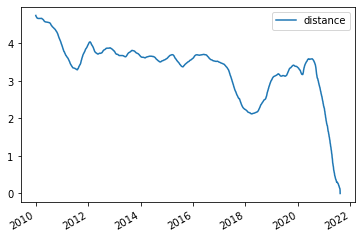

In [130]:
Distance.plot()

In [116]:
#3 문제
def maxProfit(prices,fee):     # maxProfit 함수의 input으로는 prices와 fee가 들어갑니다. 
    max_profit = 0
    total_profit = 0
    profit_len=0
    min_price = prices[0]
    max_price = prices[0]
    for i in range(0,len(prices)-1):
        if prices[i] > prices[i+1]:
            min_price=prices[i+1]

        elif prices[i] < prices[i+1]:
            min_price=prices[i]
            max_price=prices[i+1]
            max_profit=max_price-min_price
            profit_len=profit_len+1
            total_profit+=max_profit

    total_profit= total_profit-profit_len*fee

    return total_profit  # max_profit 값을 반환합니다.

In [117]:
#3. 예시1
prices = [1000,3000,2000,8000,4000,9000]
fee = 1000
print(maxProfit(prices,fee)) #1000+5000+4000

10000


In [118]:
#3. 예시2
prices = [1000,3000,7000,5000,10000,3000]
fee = 1500
print(maxProfit(prices,fee)) #500+2500+3500

6500


In [131]:
#문제4
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from scipy import stats


In [135]:
train_df=pd.read_csv('C:/Users/SEO/Desktop/python/FIND-A/titanic_train.csv')
test_df=pd.read_csv('C:/Users/SEO/Desktop/python/FIND-A/titanic_test.csv')

In [ ]:
#1 자동화 함수
train_df['age'] = train_df['age'].fillna(train_df['age'].mean())
test_df['age'] = test_df['age'].fillna(test_df['age'].mean())

train_df['embarked'] = train_df['embarked'].fillna(train_df['embarked'].mode())
test_df['embarked'] = test_df['embarked'].fillna(test_df['embarked'].mode())